$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\wv_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

<div align="center"><font size=6>Playing with MNIST Classifier</font></div>

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pickle
import gzip

from A5mysolution import *

ModuleNotFoundError: No module named 'A5mysolution'

In [6]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)
Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)
Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(f'{Xtrain.shape=} {Ttrain.shape=}')
print(f'{Xval.shape=} {Tval.shape=}')
print(f'{Xtest.shape=} {Ttest.shape=}')

FileNotFoundError: [Errno 2] No such file or directory: 'mnist.pkl.gz'

<IPython.core.display.Javascript object>


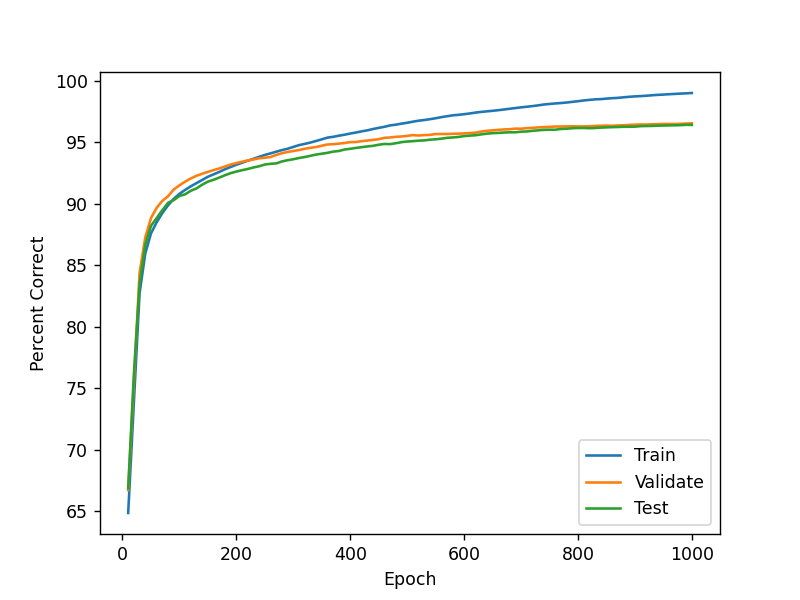

Train accuracy 98.994
Val accuracy 96.53
Test accuracy 96.39999999999999


In [58]:
model = NeuralNetwork(Xtrain.shape[1], [100, 100, 50], np.unique(Ttrain))

n_epochs = 1000
if False:
    model.train(Xtrain, Ttrain, n_epochs, 0.1, verbose=True)
else:
    
    fig = plt.figure()
    val_every_epoch = 10
    percent_correct_all = []
    for first_epoch in range(0, n_epochs, val_every_epoch):
        model.train(Xtrain, Ttrain, val_every_epoch, 0.1, verbose=False)
        
        pc_train = model.percent_correct_trace[-1]
        pc_val = model.percent_correct(model.use(Xval)[0], Tval)
        pc_test = model.percent_correct(model.use(Xtest)[0], Ttest)
        if False:
            print(f'Epoch {first_epoch + val_every_epoch}: % Correct ' \
                  f'Train {pc_train:.1f} Val {pc_val:.1f} {pc_test:.1f}')
        
        percent_correct_all.append([pc_train, pc_val, pc_test])
        plt.clf()
        xs = np.arange(1, 1 + len(percent_correct_all)).reshape(-1, 1)
        xs = xs * val_every_epoch
        xs = xs.repeat(3, axis=1) #one column of x values for each column of pc's
        plt.plot(xs, percent_correct_all)
        plt.legend(('Train', 'Validate', 'Test'))
        plt.xlabel('Epoch')
        plt.ylabel('Percent Correct')
        fig.canvas.draw()


print('Train accuracy', model.percent_correct(Ttrain, model.use(Xtrain)[0]))
print('Val accuracy', model.percent_correct(Tval, model.use(Xval)[0]))
print('Test accuracy', model.percent_correct(Ttest, model.use(Xtest)[0]))

with open('mnist_net.pkl', 'wb') as f:
    pickle.dump(model, f)

In [64]:
with open('mnist_net.pkl', 'wb') as f:
    pickle.dump(model, f)

In [65]:
!ls -l mnist_net.pkl

-rw-rw-r-- 1 anderson anderson 806769 Mar 27 20:13 mnist_net.pkl


In [66]:
with open('mnist_net.pkl', 'rb') as f:
    model = pickle.load(f)

<IPython.core.display.Javascript object>


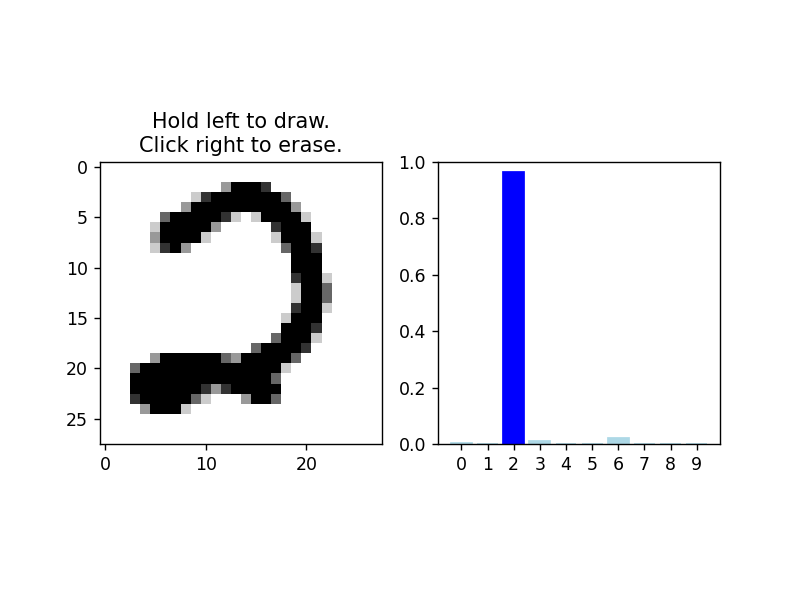

10

In [59]:
cmap = matplotlib.colors.ListedColormap(['white', 'black'])

fig = plt.figure(1)
plt.subplot(1, 2, 1)
image_plot = plt.imshow(np.zeros((28, 28)), cmap='binary', vmin=0, vmax=1)
plt.title('Hold left to draw.\nClick right to erase.')
image_data = image_plot.get_array().data

plt.subplot(1, 2, 2)

bars = plt.bar(range(10), [0.1] * 10, color='lightblue')
plt.xticks(range(10))
plt.ylim(0, 1)
ax = plt.gca()
ax.set_aspect(1 / ax.get_data_ratio())

def plot_probs(model, image_data):
    _, probs = model.use(image_data.reshape(1, 784))
    max_bar = np.argmax(probs)        
    for i, bar in enumerate(bars):
        bar.set_height(probs[0, i])
        bar.set_color('blue' if i == max_bar else 'lightblue')

plot_probs(model, image_data)

def on_click(event):
    if event.inaxes and event.button == 3:
        image_data[:] = 0.0
        image_plot.set_array(image_data)
        plot_probs(model, image_data)
    plt.draw()
    
def on_move(event):
    if event.inaxes and event.button == 1:
        x = int(event.xdata + 0.5)
        y = int(event.ydata + 0.5)
        
        image_data[y, x] = 1.0
        
        image_data[y-1, x] += 0.4
        image_data[y+1, x] += 0.4
        image_data[y, x-1] += 0.4
        image_data[y, x+1] += 0.4
        
        image_data[y-1, x-1] += 0.2
        image_data[y-1, x+1] += 0.2
        image_data[y+1, x+1] += 0.2
        image_data[y+1, x-1] += 0.2
        
        image_data[image_data > 1] = 1
        
        image_plot.set_array(image_data)
    
        plot_probs(model, image_data)
     
    plt.draw()
    
fig.canvas.mpl_connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)
